In [30]:
%matplotlib inline
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

#we use a simple open command for the file (basic Python)
f = open('UltrasoundSampleSignal.dat','rb')
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
AllSignal = np.fromfile(f,count=-1,dtype=np.uint16)
#to verify the size of the file I am printing here the lenght of that array 
print('\n The length of the file is: ' + str(len(AllSignal)) + ' as expected from 15000 samples x 462 lines')
#we will now populate an array for the time which we now is 1/125MHz step for a total of 15000
x=np.arange(0,15000/125e6,1/125e6)  #start,stop,step
print('\n The length of the time array is: ' + str(len(x)) )


 The length of the file is: 6930000 as expected from 15000 samples x 462 lines

 The length of the time array is: 15000


In [31]:
FirstLine=AllSignal[:15000] #First Line of the 15000 lines
dataF=FirstLine-np.mean(FirstLine) #data in the first line where is dc signal is removed from it
L=len(dataF)  #length of the data in first line
#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
f=np.arange(0,125e6/2,125e6/15000) #
Y=np.fft.fft(dataF) #fft of the data in first line
PyyClean=abs(Y)/L #taking the positive side of the fft transformed signal

In [32]:
#What is the noise threshold (i.e. amplitude at 4.5MHz for the clean first line)?

z=max(PyyClean)   #taking the maximum value of the time array
print "Noise Threshold is  " + str(z)


Noise Threshold is  120.198226193


Line 158  has amplitude above noise threshold
Line 159  has amplitude above noise threshold
Line 160  has amplitude above noise threshold
Line 161  has amplitude above noise threshold
Line 162  has amplitude above noise threshold
Line 163  has amplitude above noise threshold
Line 164  has amplitude above noise threshold
Line 165  has amplitude above noise threshold
Line 166  has amplitude above noise threshold
Line 167  has amplitude above noise threshold
Line 168  has amplitude above noise threshold
Line 169  has amplitude above noise threshold
Line 170  has amplitude above noise threshold
Line 171  has amplitude above noise threshold
Line 172  has amplitude above noise threshold
Line 173  has amplitude above noise threshold
Line 174  has amplitude above noise threshold
Line 222  has amplitude above noise threshold
Line 225  has amplitude above noise threshold
Line 226  has amplitude above noise threshold
Line 227  has amplitude above noise threshold
Line 228  has amplitude above nois

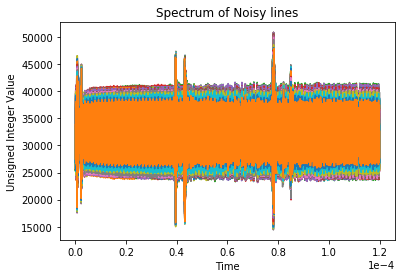

In [38]:
totlines=np.arange(462) #total no. of lines
i=0 
idx=np.where(f>=4.5e6) #the freq is higher than 4.5Mhz
x=np.arange(0,15000/125e6,1/125e6)
for index in totlines: #Calculating the data for all lines
    dataN=AllSignal[index*15000:(index+1)*15000]-np.mean(AllSignal[index*15000:(index+1)*15000]) 
    L=len(dataN)
    Y=np.fft.fft(dataN)
    Pyy=abs(Y)/L
    A=np.amax(Pyy[idx[0][0]]) #To find peak of Pyy with frequency higher than 4.5Mhz
    
    
    if A>120.2:     # Compare with 120.198 noise threshold
        i=i+1
        print "Line " +str(index) + "  has amplitude above noise threshold" 
        Signal=AllSignal[index*15000:(index+1)*15000]
        plt.plot(x,AllSignal[index*15000:(index+1)*15000])
        plt.title('Spectrum of Noisy lines')
        plt.xlabel('Time')
        plt.ylabel('Unsigned Integer Value')
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
print "Total Number of Noise lines are  " + str(i)
